# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine learning can be considered as an appropriate solution for this case.
- The dataset consists of larger number of records with several features that can be used to capture patterns associated with weather-related delays.
- General predictive methods can be inefficient, as weather-related delays may involve complex, nonlinear patterns that machine learning algorithms can uncover.
- By training a machine learning model on historical flight and weather data, we can create a reliable predictive model to inform customers about delays, improving customer experience in a way that manual methods could not efficiently achieve.

### 2. Formulate the business problem, success metrics, and desired ML output.

The travel booking website aims to enhance customer satisfaction by notifying customers about potential weather-related flight delays before they book their flights. This feature will apply to flights to and from the busiest domestic airports in the US. By providing this information, the company seeks to improve transparency, reduce customer frustration due to unexpected delays, and, ultimately, increase customer retention and loyalty.

1. Success Metrics:

- Model Performance Metrics:

    - Recall for Delayed Flights: This is the primary success metric, as we want to capture as many true weather-related delays as possible to alert affected customers effectively.
    - Precision for Delayed Flights: Minimizing false positives is also important to avoid unnecessary alerts that could inconvenience customers.
    - Overall Model Accuracy: While not the primary metric, overall accuracy will provide a general sense of model performance.

2. Business Impact Metrics:

    -   Customer Satisfaction (CSAT): A higher CSAT score based on feedback from customers who were notified of potential delays in advance.

3. Desired ML Output
    - The desired output of the machine learning model is a binary prediction (Yes/No) indicating whether a flight is expected to be delayed due to weather.

    - This model output will be integrated into the website's booking interface, providing real-time delay predictions as part of the customer experience.

    - The model should, therefore, be designed to balance high recall and precision, providing accurate and actionable information without overwhelming users with false delay warnings.

### 3. Identify the type of ML problem you’re dealing with.

The type of machine learning problem we’re dealing with here is a binary classification problem.

- In this scenario, the model's goal is to classify flights into one of two categories:
    - Delayed due to weather (Yes)
    - Not delayed due to weather (No)
 
- Problem Characteristics:
    - Supervised Learning: We have historical data with known outcomes (labels) indicating whether flights were delayed due to weather, enabling us to train a model to make predictions.
    - Binary Classification: The model output will be one of two classes, indicating whether a delay due to weather is expected or not.

Given these characteristics, we can utilize classification algorithms suited for binary outcomes, such as Logistic Regression, Decision Trees, Random Forests, or more advanced methods like Gradient Boosting and Neural Networks, depending on the complexity of the data and desired accuracy.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [4]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline

# <please add any other library or function you are aiming to import here>
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [5]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = './data/data_compressed'
base_path = os.getcwd()
csv_base_path = './data/csv_files'

!mkdir -p {csv_base_path}

In [6]:
# How many zip files do we have? write a code to answer it.

# Initialize a counter
zip_file_count = 0

# Using a for loop to iterate through all .zip files in the directory
for file in Path(zip_path).glob('*.zip'):
    zip_file_count += 1  # Increment the counter for each zip file found

print(f'Number of zip files we have is: {zip_file_count}')

Number of zip files we have is: 60


#### Extract CSV files from ZIP files

In [7]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

# Creating a list of all .zip files in the specified directory
zip_files = list(Path(zip_path).glob('*.zip'))

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_5.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_4.zip 
Extracting data/data_compressed/On_Time_Reporting_Carrier_On_Time_Perform

In [8]:
# How many csv files have we extracted? write a code to answer it.

# Initialize a counter
csv_file_count = 0

# Using a for loop to iterate through all .csv files in the directory
for csv_file in Path(csv_base_path).glob('*.csv'):
    csv_file_count += 1  # Increment the counter for each file

print(f'Number of CSV files extracted: {csv_file_count}')

Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [9]:
from IPython.display import IFrame

#IFrame(src=os.path.relpath(f"{csv_base_path}readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [10]:
df_temp = pd.read_csv(f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv')

**Question**: Print the row and column length in the dataset, and print the column names.

In [11]:
df_shape = df_temp.shape
print(f'Rows and columns in the dataset is {df_shape}')

Rows and columns in the dataset is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [12]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [13]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [14]:
# Print columns containing the word 'Del'
delay_columns = [col for col in df_temp.columns if 'Del' in col]

print(f'The columns that contain the word "Del" are:')
print('#########')
for col in delay_columns:
    print(col)


The columns that contain the word "Del" are:
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [15]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_temp.shape[0] , " and ", df_temp.shape[1])
print("The years in this dataset are: ", df_temp["Year"].unique())
print("The months covered in this dataset are: ", df_temp["Month"].unique())
print("The date range for data is :" , min(df_temp["FlightDate"]), " to ", max(df_temp["FlightDate"]))
print("The airlines covered in this dataset are: ", list(df_temp["Reporting_Airline"].unique()))
print("The Origin airports covered are: ", list(df_temp["Origin"].unique()))
print("The Destination airports covered are: ", list(df_temp["Dest"].unique()))

The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [16]:
counts = pd.DataFrame({'Origin': df_temp["Origin"].value_counts(), 
                       'Destination': df_temp['Dest'].value_counts()
                       })
counts

,Origin,Destination
ABE,303,303
ABI,169,169
ABQ,2077,2076
ABR,60,60
ABY,79,79
...,...,...
WRG,60,60
WYS,52,52
XNA,1004,1004
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [17]:
counts.sort_values(by=["Origin", "Destination"],ascending=False).head(15)


,Origin,Destination
ATL,31525,31521
ORD,28257,28250
DFW,22802,22795
DEN,19807,19807
CLT,19655,19654
LAX,17875,17873
SFO,14332,14348
IAH,14210,14203
LGA,13850,13850
MSP,13349,13347


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

In [18]:
# Enter your answer here













Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [19]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame()
    
    # Looping through each CSV file
    for file in csv_files:
        # 1. Reading the CSV file into a dataframe
        df_temp = pd.read_csv(file)
        
        # 2. Filtering the columns based on filter_cols
        df_filtered = df_temp[filter_cols]
        
        # 3. Applying the filtering conditions
        for col, vals in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(vals)]
        
        # 4. Concatenating the dataframe with the empty dataframe
        df = pd.concat([df, df_filtered], ignore_index=True)
    
    # Saveing the combined dataframe to a CSV file
    df.to_csv(file_name, index=False)

    return df

In [20]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [21]:
start = time.time()

combined_csv_filename = f"{base_path}/combined_files.csv"

# < write code to call the combined_csv function>
# List all CSV files in the directory
csv_files = [os.path.join(csv_base_path, file) for file in os.listdir(csv_base_path) if file.endswith('.csv')]
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 1.97 minutes


#### Load dataset

Load the combined dataset.

In [22]:
data = pd.read_csv("./combined_files.csv")

Print the first 5 records.

In [23]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-9.0,0.0,0.0,195.0
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,40.0,40.0,1.0,199.0
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,9.0,9.0,0.0,196.0
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-16.0,0.0,0.0,195.0
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-8.0,0.0,0.0,192.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [24]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])
print("The years in this dataset are: ", list(data["Year"].unique()))
print("The months covered in this dataset are: ", sorted(list(data["Month"].unique())))
print("The date range for data is :" , min(data["FlightDate"]), " to ", max(data["FlightDate"]))
print("The airlines covered in this dataset are: ", list(data["Reporting_Airline"].unique()))
print("The Origin airports covered are: ", list(data["Origin"].unique()))
print("The Destination airports covered are: ", list(data["Dest"].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2017, 2018, 2015, 2016]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['AA', 'DL', 'WN', 'UA', 'OO']
The Origin airports covered are:  ['DFW', 'SFO', 'DEN', 'PHX', 'IAH', 'ATL', 'ORD', 'LAX', 'CLT']
The Destination airports covered are:  ['SFO', 'DFW', 'DEN', 'PHX', 'ORD', 'IAH', 'ATL', 'LAX', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [25]:
data.rename(columns={"ArrDel15": "is_delay"}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [26]:
print(data.isnull().sum(axis=0))

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [27]:
### Remove null columns
data = data[~data["ArrDelay"].isnull() & ~data["AirTime"].isnull()]

Get the hour of the day in 24-hour time format from CRSDepTime.

In [28]:
data['DepHourofDay'] = data["CRSDepTime"] // 100

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

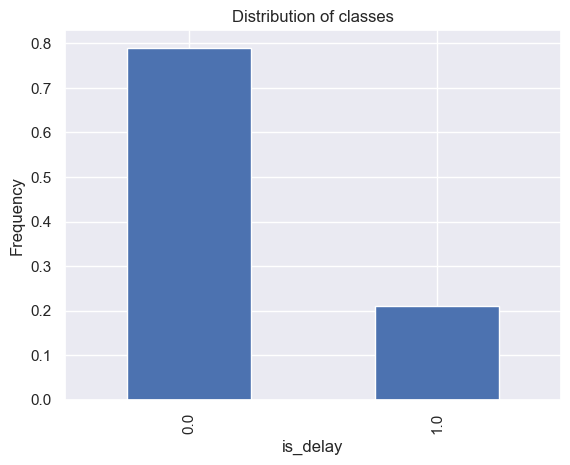

In [29]:
(data.groupby("is_delay").size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

**Answer:**

From the Features of the dataset we know that; 
- is_delay = Arrival Delay Indicator, 15 Minutes or More (1=Yes) & (0=No).
- From the bar plot, we visualise that percentage of delay(1) is approximately 20%, whereas non-delay(0) percentage is approximately 80%.
- Hence, we can deduce that majority of the flights don't have delays, suggesting that most of the flights arrived on time or with minimal delays (less than 15 minutes).
- This aligns with most of the real-world scenario, where non-delayed flights are more frequent than delayed ones.

---

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

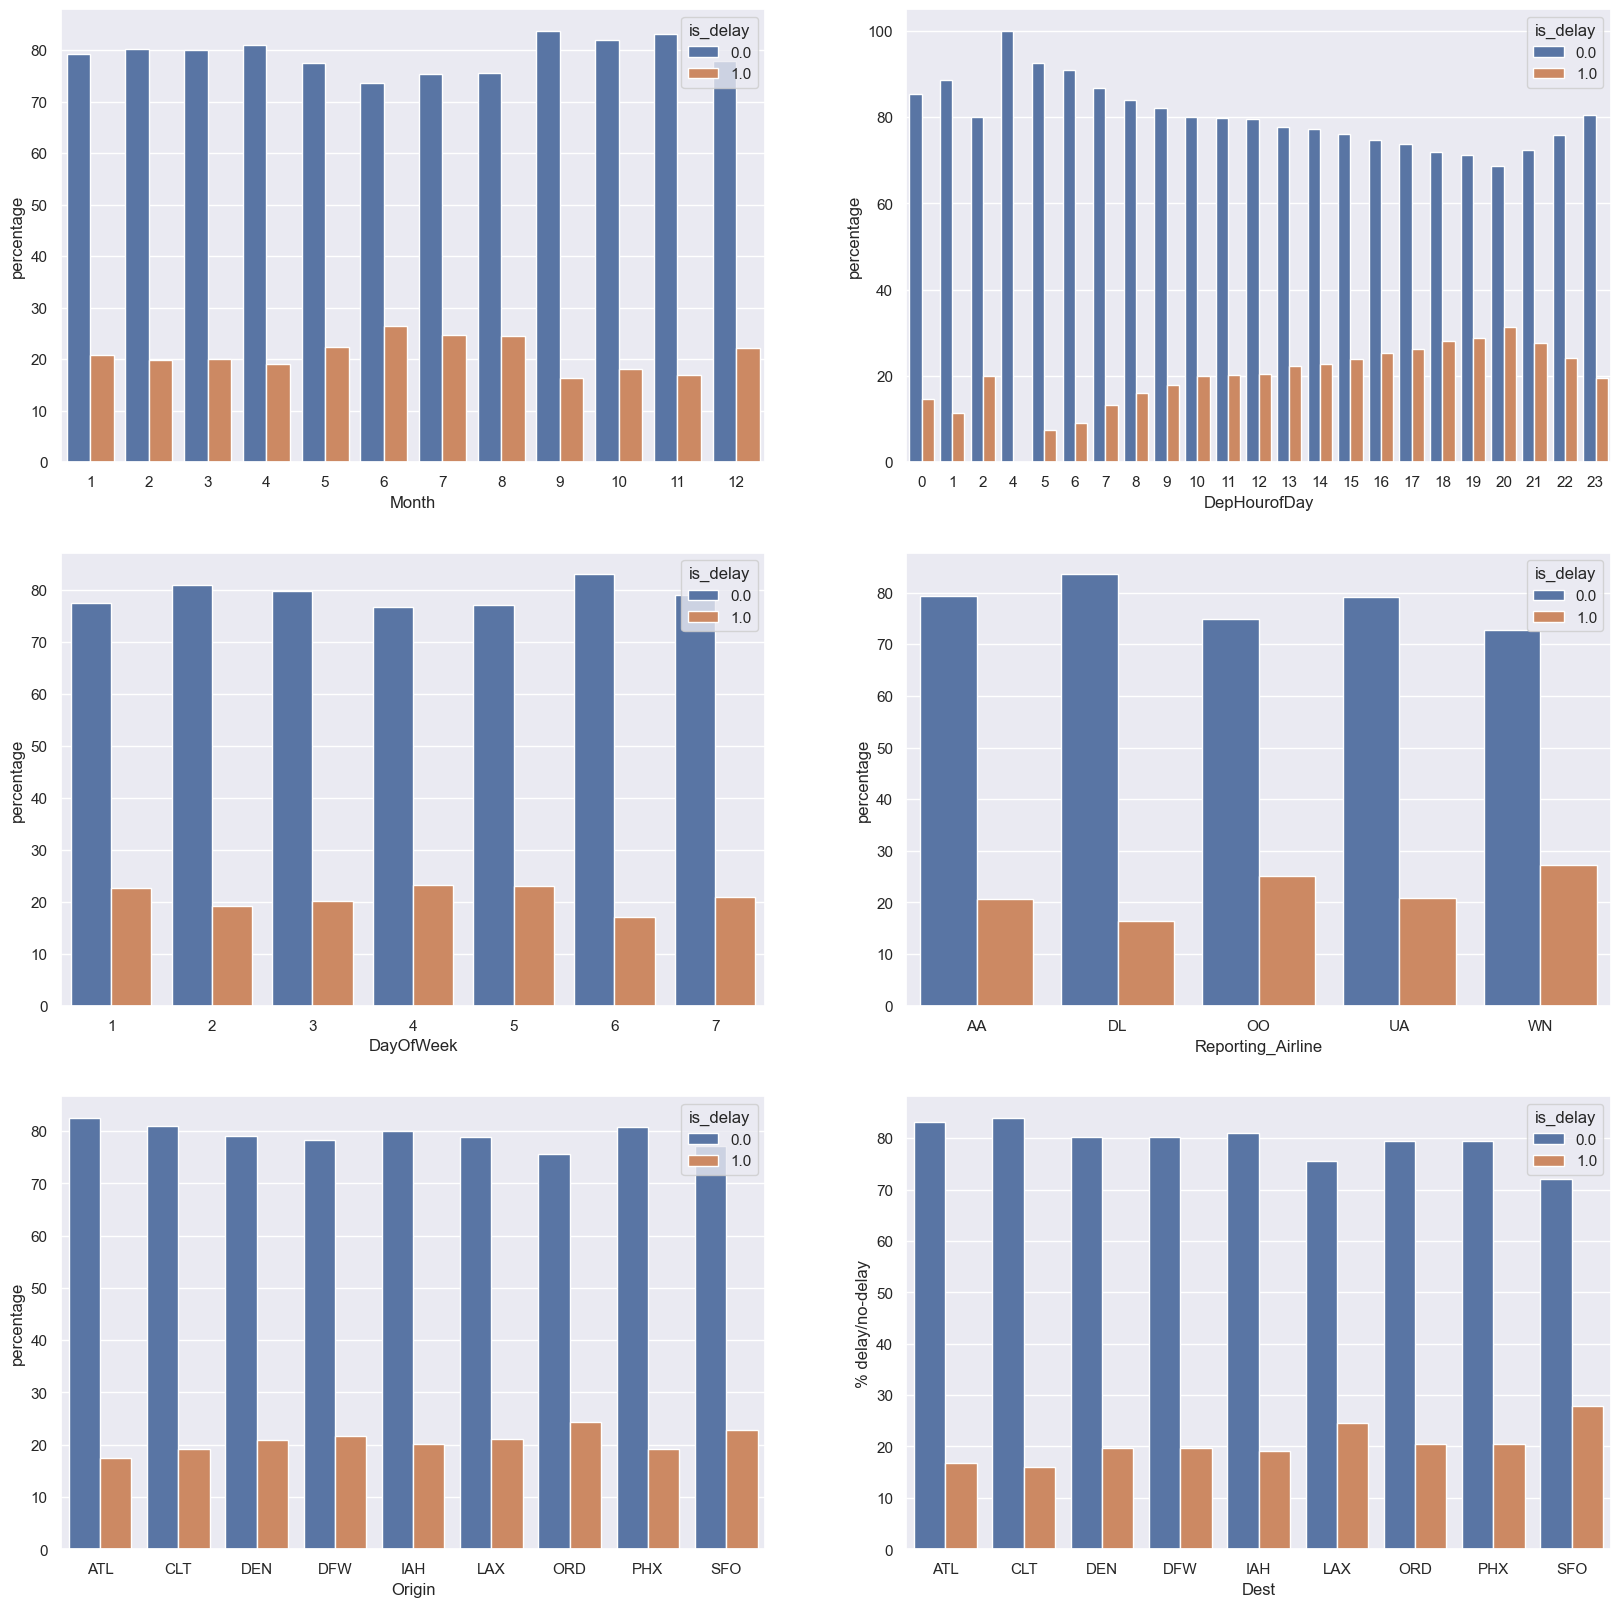

In [30]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

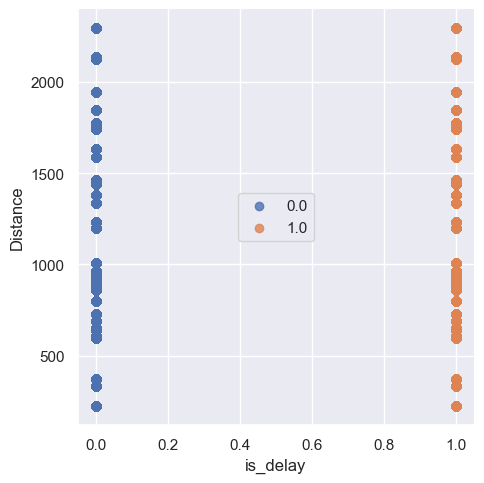

In [31]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

**Answers:**

---
**Which months have the most delays?**
 > Ans: From the plot, Month-6 (i.e. June) appears to have the most delyas. However, delays seem to be consistent across the months with not vast differences between the top 5 delays experiencing months - 5(May), 6(June-MostDelays), 7(July), 8(August) and 12(December).
 ---
**What time of the day has the most delays?**
> The time 20:00 (i.e 8pm) of the day appears to have the most delays, with the time range between (15:00 to 22:00) experiencing the most of the delays count.
---
**What day of the week has the most delays?**
> Day-4(Thursday) of the week seems to be the day with the most delays.
However Days - 4(Thursday), 5(Friday), 1(Monday), 7(Sunday); appear to have similar percentage of delays. So the passengers may take into account of these fours days (in the given order) as the ones experiencing the most delays.
---
**Which airline has the most delays?**
> WN (Southwest Airlines) appears to have the most delays, closely followed by the Airlines - OO(SkyWest Airlines)
---
**Which origin and destination airports have the most delays?**
> ORD (O'Hare International Airport) as origin airport and, SFO(San Francisco International Airport) as destination airport have the most delays. 
---
**Is flight distance a factor in the delays?**
> The scatter plot suggests that there is no clear relationship between flight distance and delays. Delays are present across both short and long-distance flights, indicating that distance alone is not a major factor in predicting delays.
___

### Features

Look at all the columns and what their specific types are.

In [32]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [33]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [34]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Convert specified columns to 'category' dtype
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Splitting "Treat DepHourofDay" into Bucket as:
# Morning: 4AM - 12PM
# Afternoon: 12PM - 4PM
# Evening: 4PM - 8PM
# Night: 8PM - 4AM

# Define time-of-day buckets for DepHourofDay
def assign_time_of_day(hour):
    if 4 <= hour <12:
        return 'Morning'
    elif 12 <= hour <16:
        return 'Afternoon'
    elif 16 <= hour <20:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create the 'DepPeriodOfDay' column
data['DepHourofDay'] = data['DepHourofDay'].apply(assign_time_of_day).astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [35]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [36]:
print("Length of dataset is: ", len(data))

Length of dataset is:  1635590


In [37]:
print("Length of new columns is: ", data.shape[1])
##################################
print(data.columns)

Length of new columns is:  75
Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [38]:
data.rename(columns = {"is_delay" : "target"}, inplace=True )

In [39]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
data.to_csv('combined_csv_v1.csv', index=False)

# note this combined file will be used in part B

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [40]:
from sklearn.model_selection import train_test_split

# Spliting the data into `train_data` and `test_data`
train_data, test_data = train_test_split(data, test_size=0.20, random_state=42, stratify=data['target'])

# Separate features and target variable
X_train = train_data.drop(columns=['target'])  # Features for training
y_train = train_data['target']                 # Target for training
X_test = test_data.drop(columns=['target'])    # Features for testing
y_test = test_data['target']                   # Target for testing

In [41]:
# Checking the shape of Training and Test:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1308472, 74) (1308472,)
(327118, 74) (327118,)


In [42]:
# display missing values
X_train.isnull().sum()
X_test.isnull().sum()
y_train.isnull().sum()
y_test.isnull().sum()

0

### Baseline classification model

In [43]:
from sklearn.linear_model import LogisticRegression

# Building a logistic regression model
logistic_model = LogisticRegression(max_iter=500, random_state=42)

# Fiting the model on the training data
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=500, random_state=42)

In [44]:
print("Number of iterations used:", logistic_model.n_iter_)

Number of iterations used: [490]


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [45]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted, labels=None):
    con_matrix = confusion_matrix(test_labels, target_predicted)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(con_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix - Heat Map", fontsize=12)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


In [46]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

def plot_roc(test_labels, target_predicted):
   false_pos_rate, true_pos_rate, _ = roc_curve(test_labels, target_predicted)
   roc_auc = auc(false_pos_rate, true_pos_rate)

   plt.figure(figsize=(6, 4))
   plt.plot(false_pos_rate, true_pos_rate, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
   plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
   plt.xlim([0.0, 1.0])
   plt.ylim([0.0, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title('Receiver Operating Characteristic (ROC) Curve')
   plt.legend(loc="lower right")
   plt.show()
   

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

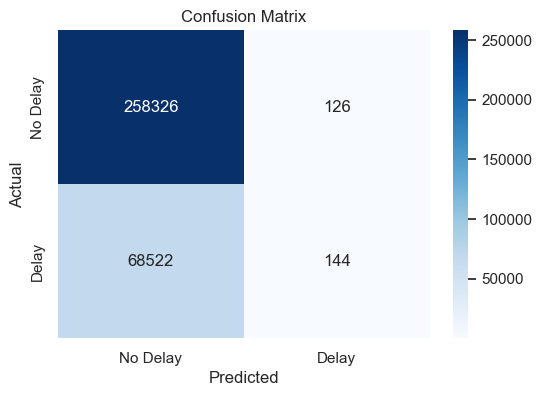

In [47]:
# Make predictions on the test data
y_pred_test = logistic_model.predict(X_test)

plot_confusion_matrix(y_test, y_pred_test, labels=['No Delay', 'Delay'])

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

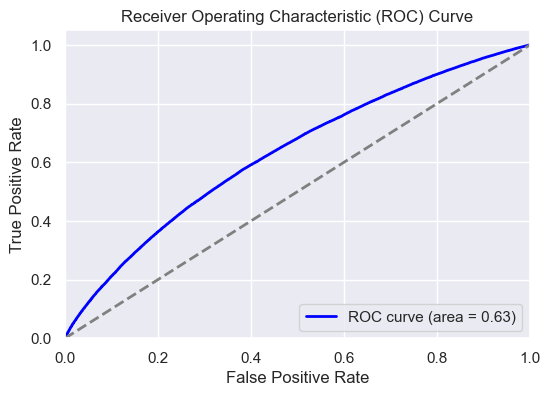

In [48]:
y_pred_test_proba = logistic_model.predict_proba(X_test)[:, 1]

# Call the function with test labels and predicted probabilities
plot_roc(y_test, y_pred_test_proba)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict probabilities for training and test data
train_predicted_prob = logistic_model.predict_proba(X_train)[:, 1]
test_predicted_prob = logistic_model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions at a threshold of 0.5 for training and test data
train_predicted_binary = (train_predicted_prob >= 0.5).astype(int)
test_predicted_binary = (test_predicted_prob >= 0.5).astype(int)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, train_predicted_binary)
train_precision = precision_score(y_train, train_predicted_binary)
train_recall = recall_score(y_train, train_predicted_binary)
train_f1 = f1_score(y_train, train_predicted_binary)
train_con_matrix = confusion_matrix(y_train, train_predicted_binary)
train_tn, train_fp, train_fn, train_tp = train_con_matrix.ravel()
train_specificity = train_tn / (train_tn + train_fp)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, test_predicted_binary)
test_precision = precision_score(y_test, test_predicted_binary)
test_recall = recall_score(y_test, test_predicted_binary)
test_f1 = f1_score(y_test, test_predicted_binary)
test_con_matrix = confusion_matrix(y_test, test_predicted_binary)
test_tn, test_fp, test_fn, test_tp = test_con_matrix.ravel()
test_specificity = test_tn / (test_tn + test_fp)

# Create a comparison table
comparison_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall (Sensitivity)", "F1 Score", "Specificity"],
    "Training Data": [train_accuracy, train_precision, train_recall, train_f1, train_specificity],
    "Test Data": [test_accuracy, test_precision, test_recall, test_f1, test_specificity]
})

# Display the comparison table
print(comparison_table)


                 Metric  Training Data  Test Data
0              Accuracy       0.790154   0.790143
1             Precision       0.539216   0.533333
2  Recall (Sensitivity)       0.002203   0.002097
3              F1 Score       0.004387   0.004178
4           Specificity       0.999500   0.999512


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


In [50]:
# Enter your answer here and turn the cell type into markdown

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [51]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [52]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

# Converting 'FlightDate' to datetime
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Defining the holidays for the years 2014 to 2018
holidays_14 = ['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', 
                '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25']
holidays_15 = ['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-07-04', 
                '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25']
holidays_16 = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', 
                '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04', 
                '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', 
                '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25']

# Combining all holidays into a single list
holidays = pd.to_datetime(holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18)

# Adding a new column 'is_holiday' to the DataFrame
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays).astype(int)

# View the updated DataFrame
print(data_orig[['FlightDate', 'is_holiday']].head(5))

  FlightDate  is_holiday
0 2014-10-01           0
1 2014-10-02           0
2 2014-10-03           0
3 2014-10-04           0
4 2014-10-05           0


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [53]:
import requests

url = "https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31"

# File path where the data should be saved
file_name = "./data/daily-summaries.csv"

# Send GET request to fetch the data
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the data in the specified folder
    with open(file_name, "wb") as file:
        file.write(response.content)
    print('Data downloaded successfully')
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

Data downloaded successfully


In [54]:
weather = pd.read_csv("./data/daily-summaries-2024-10-31T10-50-28.csv") # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [55]:
weather['MONTH'] = weather["DATE"].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [56]:
weather.SNOW.fillna(0, inplace=True)# Enter your code here
weather.SNWD.fillna(0, inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [57]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]

# Print the indices
print("\n Indices with missing values for TAVG: \n", TAVG_idx)
print("\n Indices with missing values for TMAX: \n", TMAX_idx)
print("\n Indices with missing values for TMIN: \n", TMIN_idx)


 Indices with missing values for TAVG: 
 [ 3956  3957  3958  3959  3960  3961  3962  3963  3964  3965  3966  3967
  3968  3969  3970  3971  3972  3973  3974  3975  3976  3977  3978  3979
  3980  3981  3982  3983  3984  3985  4017  4018  4019  4020  4021  4022
  4023  4024  4025  4026  4027  4028  4029  4030  4031  4032  4033  4034
  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044  4045  4046
  4047 13420]

 Indices with missing values for TMAX: 
 [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]

 Indices with missing values for TMIN: 
 [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [58]:
weather_impute = weather.groupby(['STATION', 'airport']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

,STATION,airport,TAVG,TMAX,TMIN
0,USW00003017,DEN,112.931445,190.020263,32.978642
1,USW00003927,DFW,198.463308,256.026287,143.678532


Merge the mean data with the weather data.

In [59]:
# Check the columns in weather DataFrame
print("Weather Columns:", weather.columns)

Weather Columns: Index(['STATION', 'DATE', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'airport', 'MONTH'],
      dtype='object')


In [60]:
### get the yesterday's data
# Create 'MONTH' column if it does not exist
if 'MONTH' not in weather.columns:
    weather['MONTH'] = pd.to_datetime(weather['DATE']).dt.month.astype(str).str.zfill(2)

weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG': 'mean', 'TMAX': 'mean', 'TMIN': 'mean'}).reset_index()

weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [61]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [62]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [63]:
# Converting the DATE column in the weather DataFrame to datetime
weather['DATE'] = pd.to_datetime(weather['DATE'])

### Add origin weather conditions
data_orig = pd.merge(
    data_orig, weather,  
                     how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport']
                     ).rename(
                         columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'}
                         ).drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(
    data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport']
    ).rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'}
             ).drop(columns=['DATE','airport'])

# Viewing the DataFrame
data_orig.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,DepHourofDay,is_holiday,AWND_O,PRCP_O,SNOW_O,TAVG_O,AWND_D,PRCP_D,SNOW_D,TAVG_D
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,...,7,0,57,0,0.0,281.0,25,0,0.0,209.0
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,...,7,0,72,81,0.0,284.0,11,0,0.0,226.0
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,...,7,0,49,0,0.0,219.0,24,0,0.0,244.0
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,...,7,0,29,0,0.0,182.0,30,0,0.0,247.0
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,...,7,0,52,0,0.0,214.0,41,0,0.0,220.0


**Note**: It is always a good practice to check nulls/NAs after joins.

In [64]:
sum(data_orig.isna().any())

0

In [65]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [66]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [67]:
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 
                                         'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)

# Concatenate the dummy variables to the original data
data = pd.concat([data, data_dummies], axis=1)

# Checking if 'is_delay' is in the list before removing it
if 'is_delay' in categorical_columns:
        categorical_columns.remove('is_delay')

# Drop the original categorical columns from the data
data.drop(categorical_columns, axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [68]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [69]:
data.rename(columns = {'is_delay': 'target'}, inplace=True )# Enter your code here

In [70]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
data.to_csv('combined_csv_v2.csv', index=False)
# note this combined file will be also used in part B

Create the training and testing sets again.

In [71]:
train_data_new, test_data_new = train_test_split(data, test_size=0.2, random_state=42)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [72]:
from imblearn.over_sampling import SMOTE

# Split features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Apply SMOTE to balance classes in training data
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new, y_train_new)

# Train logistic regression model
classifier2 = LogisticRegression(max_iter=500, random_state=42, class_weight="balanced")
classifier2.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [73]:
print("Number of iterations used:", classifier2.n_iter_)

Number of iterations used: [500]


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

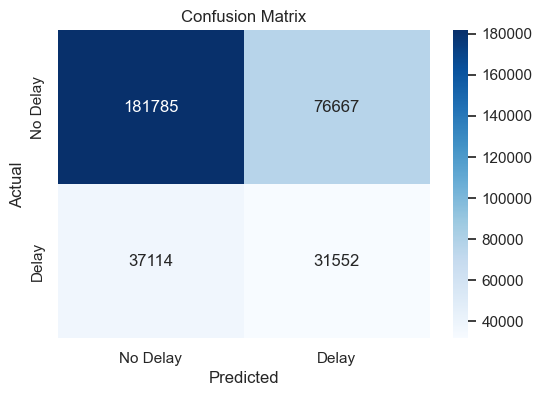

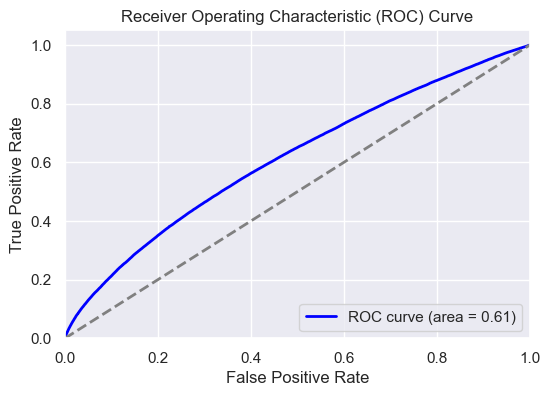

In [74]:
# Make predictions
y_pred_new = classifier2.predict(X_test_new)

plot_confusion_matrix(y_test_new, y_pred_new, labels=['No Delay', 'Delay'])

y_pred_new_proba = classifier2.predict_proba(X_test_new)[:, 1]

# Call the function with test labels and predicted probabilities
plot_roc(y_test_new, y_pred_new_proba)

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

# Predicting probabilities for training and test data
train_predicted_prob_2 = classifier2.predict_proba(X_train_resampled)[:, 1]
test_predicted_prob_2 = classifier2.predict_proba(X_test_new)[:, 1]

# Converting probabilities to binary predictions at a threshold of 0.5 for training and test data
train_predicted_binary_2 = (train_predicted_prob_2 >= 0.5).astype(int)
test_predicted_binary_2 = (test_predicted_prob_2 >= 0.5).astype(int)

# Calculating metrics for training data
train_accuracy_2 = accuracy_score(y_train_resampled, train_predicted_binary_2)
train_precision_2 = precision_score(y_train_resampled, train_predicted_binary_2)
train_recall_2 = recall_score(y_train_resampled, train_predicted_binary_2)
train_f1_2 = f1_score(y_train_resampled, train_predicted_binary_2)
train_con_matrix_2 = confusion_matrix(y_train_resampled, train_predicted_binary_2)
train_tn_2, train_fp_2, train_fn_2, train_tp_2 = train_con_matrix.ravel()
train_specificity_2 = train_tn_2 / (train_tn_2 + train_fp_2)

# Calculating metrics for test data
test_accuracy_2 = accuracy_score(y_test_new, test_predicted_binary_2)
test_precision_2 = precision_score(y_test_new, test_predicted_binary_2)
test_recall_2 = recall_score(y_test_new, test_predicted_binary_2)
test_f1_2 = f1_score(y_test_new, test_predicted_binary_2)
test_con_matrix_2 = confusion_matrix(y_test_new, test_predicted_binary_2)
test_tn_2, test_fp_2, test_fn_2, test_tp_2 = test_con_matrix_2.ravel()
test_specificity_2 = test_tn_2 / (test_tn_2 + test_fp_2)

# Creating a comparison table
comparison_table_2 = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall (Sensitivity)", "F1 Score", "Specificity"],
    "Training Data": [train_accuracy_2, train_precision_2, train_recall_2, train_f1_2, train_specificity_2],
    "Test Data": [test_accuracy_2, test_precision_2, test_recall_2, test_f1_2, test_specificity_2]
})

# Displaying the comparison table
print(comparison_table_2)


                 Metric  Training Data  Test Data
0              Accuracy       0.682904   0.652171
1             Precision       0.690597   0.291557
2  Recall (Sensitivity)       0.662724   0.459500
3              F1 Score       0.676373   0.356752
4           Specificity       0.999500   0.703361


Question: did you notice a difference by adding the extra data on the results?

In [77]:
print("\n The comparision table for first classifier was: \n")
print(comparison_table)

print("\n The comparision table for second classifier was: \n")
print(comparison_table_2)



 The comparision table for first classifier was: 

                 Metric  Training Data  Test Data
0              Accuracy       0.790154   0.790143
1             Precision       0.539216   0.533333
2  Recall (Sensitivity)       0.002203   0.002097
3              F1 Score       0.004387   0.004178
4           Specificity       0.999500   0.999512

 The comparision table for second classifier was: 

                 Metric  Training Data  Test Data
0              Accuracy       0.682904   0.652171
1             Precision       0.690597   0.291557
2  Recall (Sensitivity)       0.662724   0.459500
3              F1 Score       0.676373   0.356752
4           Specificity       0.999500   0.703361


**Question 1: How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?**
- The second model's performance on the test set is generally lower than on the training set across most metrics. For example:
- Accuracy decreased from 0.683 on the training set to 0.652 on the test set.
- recision dropped significantly from 0.691 on the training set to 0.292 on the test set.
- Recall also decreased, though less dramatically, from 0.663 on the training set to 0.460 on the test set.
- F1 Score dropped from 0.676 on the training set to 0.357 on the test set.
- Specificity remains high on the training set at 0.999 but falls to 0.703 on the test set.
- These differences suggest that the model is overfitting to the training data, especially in terms of precision and recall. The model performs well on the resampled training data, but it struggles to generalize on the test set, likely due to overfitting and class imbalance. This also indicates that the model’s ability to handle the minority class diminishes when applied to new, unseen data.

**Question 2: Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?**

- Accuracy remains moderate in both models, even though recall is very low in the first model. This is because accuracy is heavily influenced by the majority class, which dominates the dataset. The high accuracy in the first model reflects its tendency to classify most samples as the majority class, neglecting the minority class.

- In the first model, precision is moderately high, but recall is extremely low, indicating the model rarely identifies positives and avoids false positives at the expense of missing true positives.
- In the second model, recall improves dramatically, but precision on the test set drops, indicating that it identifies more positives (higher recall) but at the cost of introducing more false positives, especially on the test data.

**Question 3: Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration?**
- The most important metrics here would likely be recall and precision, as they determine the model's ability to correctly identify the minority class without generating too many false positives. In a business context, this might mean identifying delayed flights (minority class) without misclassifying too many on-time flights as delayed.

- The recall improvement in the second model is encouraging, but the drop in precision on the test set could lead to excessive false positives. This may not be sufficient if false positives are costly in this business context.

- Next Steps in Feature Engineering:
- To improve performance in the next iteration we might have to consider the following:

    - Create New Features: Investigate additional features that might better distinguish the minority class.

    - Interaction Terms: Explore interactions between features. 

    - Feature Selection: Perform feature selection to identify the most predictive features. 
    
    - Reducing noise in the dataset by removing irrelevant features can improve model generalizability and precision.

    - Outlier Detection and Handling: Identify and handle outliers that may be skewing predictions, particularly for the minority class.

    - Alternative Resampling Techniques: Experiment with different resampling methods like ADASYN (Adaptive Synthetic Sampling) or NearMiss (an undersampling technique), which may provide better balance without overfitting.

- By focusing on these improvements, the next iteration of the model could enhance recall and precision, balancing the trade-off between identifying the minority class and minimizing false positives.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

In [ ]:
# write your answers here